# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()


# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
json.dumps(btc_response, indent=1, sort_keys=True)

'{\n "data": {\n  "1": {\n   "circulating_supply": 19099775,\n   "id": 1,\n   "last_updated": 1658459623,\n   "max_supply": 21000000,\n   "name": "Bitcoin",\n   "quotes": {\n    "USD": {\n     "market_cap": 439791525565,\n     "percent_change_1h": -0.0707724819947156,\n     "percent_change_24h": 1.12133436735646,\n     "percent_change_7d": 11.8963318726111,\n     "percentage_change_1h": -0.0707724819947156,\n     "percentage_change_24h": 1.12133436735646,\n     "percentage_change_7d": 11.8963318726111,\n     "price": 23022.0,\n     "volume_24h": 60485335434\n    }\n   },\n   "rank": 1,\n   "symbol": "BTC",\n   "total_supply": 19099775,\n   "website_slug": "bitcoin"\n  }\n },\n "metadata": {\n  "error": null,\n  "num_cryptocurrencies": 3116,\n  "timestamp": 1658459623\n }\n}'

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
json.dumps(eth_response, indent=1, sort_keys=True)

'{\n "data": {\n  "1027": {\n   "circulating_supply": 119774118,\n   "id": 1027,\n   "last_updated": 1658459598,\n   "max_supply": 119774118,\n   "name": "Ethereum",\n   "quotes": {\n    "USD": {\n     "market_cap": 187640620115,\n     "percent_change_1h": -0.0270886757611074,\n     "percent_change_24h": 5.09046336017184,\n     "percent_change_7d": 31.5658965921267,\n     "percentage_change_1h": -0.0270886757611074,\n     "percentage_change_24h": 5.09046336017184,\n     "percentage_change_7d": 31.5658965921267,\n     "price": 1567.12,\n     "volume_24h": 18025645300\n    }\n   },\n   "rank": 2,\n   "symbol": "ETH",\n   "total_supply": 119774118,\n   "website_slug": "ethereum"\n  }\n },\n "metadata": {\n  "error": null,\n  "num_cryptocurrencies": 3116,\n  "timestamp": 1658459598\n }\n}'

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(btc_price)

23022.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]


# Print the current price of ETH
print(eth_price)

1567.12


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(btc_value)

27626.399999999998


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(eth_value)

8305.735999999999


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value+eth_value

# Print current cryptocurrency wallet balance
print(total_crypto_wallet)

35932.136


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY","AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-07-21", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-21", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_bars(tickers,timeframe,start = start_date,end = end_date).df

# Reorganize the DataFrame
# Separate ticker data
spy = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
agg = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([spy,agg],axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-07-21 04:00:00+00:00  394.14  398.84  391.63  398.79  63527652   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-07-21 04:00:00+00:00      520937  396.079415  101.96  102.58  101.96   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-07-21 04:00:00+00:00  102.56  5059517       19615  102.328893

In [17]:
df_portfolio["SPY"]["close"].values[0]

398.79

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price =df_portfolio["AGG"]["close"].values[0]
# Print the AGG closing price
print(agg_close_price)

102.56


In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = df_portfolio["SPY"]["close"].values[0]

# Print the SPY closing price
print(spy_close_price)

398.79


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(agg_value)

20512.0


In [21]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(spy_value)

43866.9


In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value+spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(total_stocks_bonds)

64378.9


In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(total_portfolio)

100311.036


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list
savings_data =[total_crypto_wallet,total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)

[35932.136, 64378.9]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [25]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data,columns=["amount"],index=["crypto","stock/bond"])

# Display the savings_df DataFrame
savings_df

,amount
crypto,35932.136
stock/bond,64378.900


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Members Portfolio Split'}, ylabel='amount'>

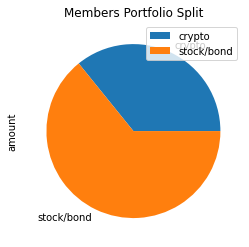

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y="amount",title="Members Portfolio Split")

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [27]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3* monthly_income
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congrats, there is enough money in the fund!"),
elif total_portfolio == emergency_fund_value :
    print("Congrats on making sure the total portfolio value is equal to the fund value! "),
else:
    print(f"The total portfolio is {emergency_fund_value-total_portfolio} dollars away from the fund")

Congrats, there is enough money in the fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [29]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date
start_date_2 = pd.Timestamp("2019-07-21", tz="America/New_York").isoformat()
end_date_2 = pd.Timestamp("2022-07-21", tz="America/New_York").isoformat()

In [30]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
df_portfolio_2 = alpaca.get_bars(tickers,timeframe,start = start_date_2,end = end_date_2).df

# Reorganize the DataFrame
# Separate ticker data
spy_2 = df_portfolio_2[df_portfolio_2['symbol']=='SPY'].drop('symbol', axis=1)
agg_2 = df_portfolio_2[df_portfolio_2['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_2 = pd.concat([spy_2,agg_2],axis=1, keys=['SPY','AGG'])

# Display both the first and last five rows of the DataFrame
print(df_portfolio_2.head(),df_portfolio_2.tail())

                              SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-07-22 04:00:00+00:00  297.61  298.50  297.04  297.90  45137404   
2019-07-23 04:00:00+00:00  299.15  300.03  298.22  300.03  44935473   
2019-07-24 04:00:00+00:00  299.16  301.44  299.09  301.44  47738870   
2019-07-25 04:00:00+00:00  300.97  301.00  299.11  300.00  55864213   
2019-07-26 04:00:00+00:00  300.77  302.23  300.62  302.01  45430077   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2019-07-22 04:00:00+00:00      186383  297.748117  111.41  111.41  111.3000   
2019-07-23 04:00:00+00:00      208847  299.177015  111.27  111.32  111.1600   
2019-07-24 04:00:00+00:00      20488

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [31]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
mcs = MCSimulation(portfolio_data = df_portfolio_2,weights = [.60,.40],num_simulation = 500,num_trading_days = 252*30)
# Review the simulation input data
mcs.portfolio_data

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-07-22 04:00:00+00:00  297.61  298.50  297.04  297.90  45137404   
2019-07-23 04:00:00+00:00  299.15  300.03  298.22  300.03  44935473   
2019-07-24 04:00:00+00:00  299.16  301.44  299.09  301.44  47738870   
2019-07-25 04:00:00+00:00  300.97  301.00  299.11  300.00  55864213   
2019-07-26 04:00:00+00:00  300.77  302.23  300.62  302.01  45430077   
...                           ...     ...     ...     ...       ...   
2022-07-15 04:00:00+00:00  382.62  385.25  380.54  385.13  79318992   
2022-07-18 04:00:00+00:00  388.27  389.09  380.66  381.95  62903915   
2022-07-19 04:00:00+00:00  386.17  392.87  385.40  392.27  78242523   
2022-07-20 04:00:00+00:00  392.50  396.26  391.03  394.77  70078151   
2022-07-21 04:00:00+00:00  394.14  398.84  391.63  398.79  63527652   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-22 04:00:00+00:00      186383  297.748117          NaN  111.41   
2019-07-23 04:00:00+00:00      208847  299.177015     0.007150  111.27   
2019-07-24 04:00:00+00:00      204882  300.570907     0.004700  111.33   
2019-07-25 04:00:00+00:00      266901  300.079179    -0.004777  111.33   
2019-07-26 04:00:00+00:00      195123  301.590773     0.006700  111.32   
...                               ...         ...          ...     ...   
2022-07-15 04:00:00+00:00      488124  383.334989     0.019105  101.94   
2022-07-18 04:00:00+00:00      489558  385.087984    -0.008257  102.00   
2022-07-19 04:00:00+00:00      533601  389.362273     0.027019  101.95   
2022-07-20 04:00:00+00:00      525951  394.158894     0.006373  102.16   
2022-07-21 04:00:00+00:00      520937  396.079415     0.010183  101.96   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2019-07-22 04:00:00+00:00  111.41  111.3000  111.31  2855073        7937   
2019-07-23 04:00:00+00:00  111.32  111.1600  111.20  2659305       10894   
2019-07-24 04:00:00+00:00  111.41  111.2950  111.36  2783461       12750   
2019-07-25 04:00:00+00:00  111.33  111.0474  111.19  2977486       11325   
2019-07-26 04:00:00+00:00  111.32  111.1400  111.21  4669863       11477   
...                           ...       ...     ...      ...         ...   
2022-07-15 04:00:00+00:00  102.35  101.9000  102.25  8440151       27300   
2022-07-18 04:00:00+00:00  102.03  101.7200  101.92  4949050       18802   
2022-07-19 04:00:00+00:00  101.99  101.6615  101.78  4240277       18210   
2022-07-20 04:00:00+00:00  102.17  101.6650  101.71  6109282       17836   
2022-07-21 04:00:00+00:00  102.58  101.9600  102.56  5059517       19615   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-22 04:00:00+00:00  111.344721          NaN  
2019-07-23 04:00:00+00:00  111.219201    -0.000988  
2019-07-24 04:00:00+00:00  111.337833     0.001439  
2019-07-25 04:00:00+00:00  111.190464    -0.001527  
2019-07-26 04:00:00+00:00  111.195450     0.000180  
...                               ...          ...  
2022-07-15 04:00:00+00:00  102.214854     0.003927  
2022-07-18 04:00:00+00:00  101.892830    -0.003227  
2022-07-19 04:00:00+00:00  101.821971    -0.001374  
2022-07-20 04:00:00+00:00  101.767981    -0.000688  
2022-07-21 04:00:00+00:00  102.328893     0.008357  

[757 rows x 16 columns]

In [32]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
mcs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 110.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 120.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 130.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 140.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 150.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 160.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 170.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 180.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 190.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 200.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 210.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 220.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 230.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 240.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 250.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 260.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 270.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 280.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 290.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 300.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 310.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 320.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 330.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 340.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 350.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 360.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 370.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 380.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 390.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 400.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 410.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 420.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 430.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 440.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 450.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 460.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 470.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 480.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 490.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001282,0.994934,1.015009,0.994655,1.002315,0.999655,0.996715,1.008568,0.984670,0.996613,...,1.004848,1.002209,1.007634,1.009420,1.012632,1.010647,1.008569,1.000985,1.012681,1.000507
2,1.009484,0.990083,1.019429,0.991953,1.005344,1.000993,0.992295,0.999514,0.993669,0.998680,...,1.000229,1.007756,1.010564,1.015292,1.016733,0.994482,1.006687,0.992177,1.016849,0.987985
3,0.998746,0.985819,1.014196,1.004985,1.010148,0.995779,0.987869,1.002821,1.006305,1.001539,...,1.009425,1.018854,1.005473,1.021976,1.022390,1.000187,1.005952,0.982037,1.026058,0.981717
4,1.003044,0.979618,0.990076,0.996850,1.012774,0.991244,1.000984,1.003589,1.003374,1.009314,...,1.021476,1.026190,0.991089,1.020621,1.020739,0.997884,1.002016,0.966338,1.030889,0.978501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.695309,2.431652,15.184540,12.608640,12.757807,6.153018,3.073124,3.210194,7.196362,4.143649,...,3.478756,1.729007,11.700005,12.063839,7.728378,9.301010,2.713048,8.712116,2.577661,2.048957
7557,11.698465,2.406611,15.269201,12.669457,12.681597,6.092847,3.058161,3.232827,7.150352,4.160693,...,3.479609,1.711547,11.669154,12.082091,7.811332,9.375834,2.747536,8.496192,2.544754,2.043679
7558,11.806381,2.446043,14.937693,12.761345,12.866992,6.105454,3.066877,3.215725,7.088724,4.104704,...,3.451969,1.715865,11.679465,12.045046,7.867666,9.423255,2.795483,8.531738,2.543222,2.044782
7559,11.939462,2.466116,14.814947,12.744621,12.740512,6.130923,3.115589,3.168669,7.101511,4.168740,...,3.521973,1.710211,11.699355,12.056292,7.866906,9.490348,2.784753,8.535437,2.524149,2.048014


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

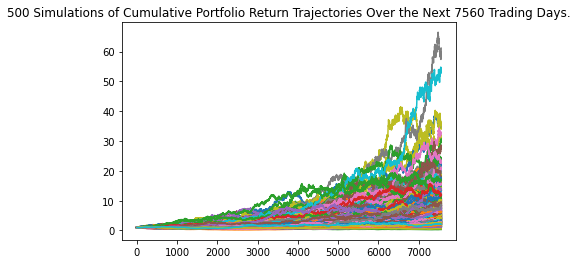

In [33]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
mcs.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

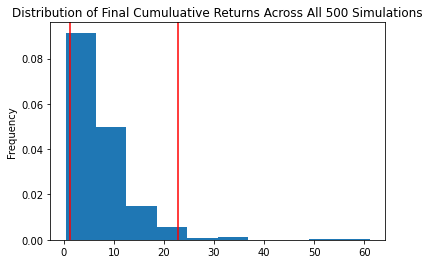

In [34]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
mcs.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [35]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
mcs_summarystats=mcs.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
mcs_summarystats

/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              7.398503
std               6.310292
min               0.331846
25%               3.408361
50%               5.797763
75%               9.244882
max              61.160882
95% CI Lower      1.281861
95% CI Upper     22.859584
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [36]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)

64378.9


In [37]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = mcs_summarystats[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = mcs_summarystats[9] * total_stocks_bonds
# Print the result of your calculations
print(ci_lower_thirty_cumulative_return,ci_upper_thirty_cumulative_return)

82524.82406215253 1471674.9022163574


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [38]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
mcs_short = MCSimulation(portfolio_data = df_portfolio_2,weights = [.80,.20],num_simulation = 500,num_trading_days = 252*10)

# Review the simulation input data
mcs_short.portfolio_data

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-07-22 04:00:00+00:00  297.61  298.50  297.04  297.90  45137404   
2019-07-23 04:00:00+00:00  299.15  300.03  298.22  300.03  44935473   
2019-07-24 04:00:00+00:00  299.16  301.44  299.09  301.44  47738870   
2019-07-25 04:00:00+00:00  300.97  301.00  299.11  300.00  55864213   
2019-07-26 04:00:00+00:00  300.77  302.23  300.62  302.01  45430077   
...                           ...     ...     ...     ...       ...   
2022-07-15 04:00:00+00:00  382.62  385.25  380.54  385.13  79318992   
2022-07-18 04:00:00+00:00  388.27  389.09  380.66  381.95  62903915   
2022-07-19 04:00:00+00:00  386.17  392.87  385.40  392.27  78242523   
2022-07-20 04:00:00+00:00  392.50  396.26  391.03  394.77  70078151   
2022-07-21 04:00:00+00:00  394.14  398.84  391.63  398.79  63527652   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-22 04:00:00+00:00      186383  297.748117          NaN  111.41   
2019-07-23 04:00:00+00:00      208847  299.177015     0.007150  111.27   
2019-07-24 04:00:00+00:00      204882  300.570907     0.004700  111.33   
2019-07-25 04:00:00+00:00      266901  300.079179    -0.004777  111.33   
2019-07-26 04:00:00+00:00      195123  301.590773     0.006700  111.32   
...                               ...         ...          ...     ...   
2022-07-15 04:00:00+00:00      488124  383.334989     0.019105  101.94   
2022-07-18 04:00:00+00:00      489558  385.087984    -0.008257  102.00   
2022-07-19 04:00:00+00:00      533601  389.362273     0.027019  101.95   
2022-07-20 04:00:00+00:00      525951  394.158894     0.006373  102.16   
2022-07-21 04:00:00+00:00      520937  396.079415     0.010183  101.96   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2019-07-22 04:00:00+00:00  111.41  111.3000  111.31  2855073        7937   
2019-07-23 04:00:00+00:00  111.32  111.1600  111.20  2659305       10894   
2019-07-24 04:00:00+00:00  111.41  111.2950  111.36  2783461       12750   
2019-07-25 04:00:00+00:00  111.33  111.0474  111.19  2977486       11325   
2019-07-26 04:00:00+00:00  111.32  111.1400  111.21  4669863       11477   
...                           ...       ...     ...      ...         ...   
2022-07-15 04:00:00+00:00  102.35  101.9000  102.25  8440151       27300   
2022-07-18 04:00:00+00:00  102.03  101.7200  101.92  4949050       18802   
2022-07-19 04:00:00+00:00  101.99  101.6615  101.78  4240277       18210   
2022-07-20 04:00:00+00:00  102.17  101.6650  101.71  6109282       17836   
2022-07-21 04:00:00+00:00  102.58  101.9600  102.56  5059517       19615   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-22 04:00:00+00:00  111.344721          NaN  
2019-07-23 04:00:00+00:00  111.219201    -0.000988  
2019-07-24 04:00:00+00:00  111.337833     0.001439  
2019-07-25 04:00:00+00:00  111.190464    -0.001527  
2019-07-26 04:00:00+00:00  111.195450     0.000180  
...                               ...          ...  
2022-07-15 04:00:00+00:00  102.214854     0.003927  
2022-07-18 04:00:00+00:00  101.892830    -0.003227  
2022-07-19 04:00:00+00:00  101.821971    -0.001374  
2022-07-20 04:00:00+00:00  101.767981    -0.000688  
2022-07-21 04:00:00+00:00  102.328893     0.008357  

[757 rows x 16 columns]

In [39]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
mcs_short.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 110.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 120.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 130.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 140.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 150.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 160.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 170.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 180.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 190.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 200.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 210.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 220.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 230.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 240.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 250.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 260.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 270.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 280.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 290.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 300.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 310.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 320.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 330.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 340.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 350.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 360.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 370.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 380.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 390.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 400.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 410.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 420.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 430.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 440.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 450.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 460.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 470.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 480.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

Running Monte Carlo simulation number 490.


/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992643,1.033719,0.988221,0.996804,0.983894,0.996896,1.006685,1.009358,0.999442,0.999048,...,1.007749,0.999340,1.022323,1.017818,1.008626,1.015149,0.978009,1.005001,0.987337,0.987604
2,0.993001,1.017987,0.984311,1.012841,0.974746,1.002193,1.000946,1.020088,0.992445,1.002931,...,1.009233,0.982902,1.013587,1.015598,0.992896,1.027230,0.971381,1.001614,0.977498,1.007899
3,1.015666,1.015124,1.001280,1.016823,1.002191,0.998234,0.993081,1.025229,0.987941,1.026107,...,1.018973,0.996419,0.992938,1.024908,0.981449,1.030422,0.985290,0.995140,0.956390,0.993174
4,1.009269,1.033151,1.004652,1.020026,1.008169,0.999769,0.983356,1.012078,1.000543,1.021246,...,1.038731,0.989061,0.993586,1.037222,1.001850,1.043380,0.986796,0.970216,0.966700,0.992385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.115216,0.839217,3.249353,0.671836,5.352794,10.022061,1.126056,3.574336,2.241405,1.849059,...,1.379019,2.183948,2.261382,2.236992,2.679533,1.410433,1.531808,3.880378,2.148973,1.091049
2517,2.090332,0.841431,3.290996,0.679132,5.336342,10.098271,1.146322,3.578191,2.215247,1.843667,...,1.395486,2.227048,2.233431,2.239570,2.720853,1.425572,1.506876,3.875342,2.130012,1.080270
2518,2.104047,0.836682,3.336771,0.676899,5.279442,10.172489,1.122522,3.593653,2.221382,1.828044,...,1.387842,2.222898,2.256115,2.226665,2.671679,1.418845,1.483010,3.833793,2.143649,1.078354
2519,2.069021,0.827954,3.338456,0.671623,5.357364,10.153065,1.139031,3.576380,2.168645,1.841215,...,1.399137,2.226396,2.248507,2.243420,2.669217,1.408927,1.472478,3.903046,2.128007,1.100906


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

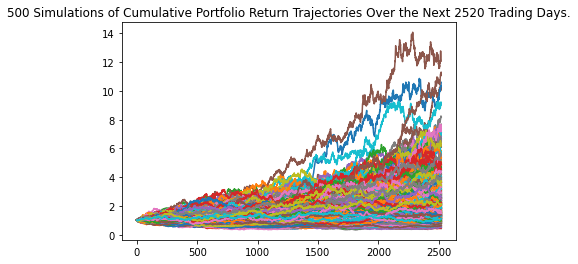

In [40]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
mcs_short.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

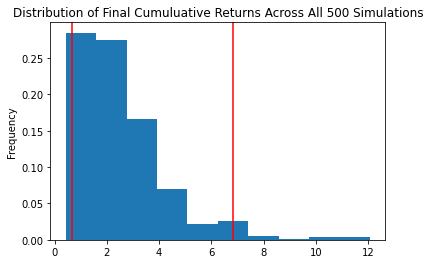

In [41]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
mcs_short.plot_distribution()

In [42]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
mcs_short_summarystats=mcs_short.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
mcs_short_summarystats

/Users/AbhirMehra/Downloads/Columbia Bootcamp/Challenges/Challenge 5/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              2.589532
std               1.676669
min               0.426489
25%               1.402286
50%               2.176588
75%               3.317056
max              12.074259
95% CI Lower      0.687400
95% CI Upper      6.841867
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [43]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)

64378.9


In [44]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = mcs_short_summarystats[8] *total_stocks_bonds
ci_upper_ten_cumulative_return = mcs_short_summarystats[9] * total_stocks_bonds
# Print the result of your calculations
print(ci_lower_ten_cumulative_return,ci_upper_ten_cumulative_return)

44254.07473278535 440471.9013091479


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** The difference in the upper and lower confidence internvals between the short and longer period simulations are substantial. The lower confidence interval for 30 years as well as the upper condifence interval for 30 years is higher than the respective 10 year intervals. Thus, weighing stocks more heavily in order to help retire after ten years does not seem beneficial.